In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
import pandas as pd

In [2]:
pwd

'd:\\HMOT강의\\scripts'

In [4]:
dir_path = '../data/'
df = pd.read_csv(dir_path + 'president_heights.csv')
df.head()
df.tail()

,order,name,height(cm)
0,1,George Washington,189
1,2,John Adams,170
2,3,Thomas Jefferson,189
3,4,James Madison,163
4,5,James Monroe,183


,order,name,height(cm)
37,40,Ronald Reagan,185
38,41,George H. W. Bush,188
39,42,Bill Clinton,188
40,43,George W. Bush,182
41,44,Barack Obama,185


In [5]:
df.shape

(42, 3)

In [6]:
df.isnull().sum()

order         0
name          0
height(cm)    0
dtype: int64

In [7]:
df.describe()

,order,height(cm)
count,42.000000,42.000000
mean,22.476190,179.738095
std,13.152461,7.015869
min,1.000000,163.000000
25%,11.250000,174.250000
50%,22.000000,182.000000
75%,33.750000,183.000000
max,44.000000,193.000000


In [8]:
import numpy as np

In [9]:
heights = np.array(df['height(cm)'])
heights
type(heights)

array([189, 170, 189, 163, 183, 171, 185, 168, 173, 183, 173, 173, 175,
       178, 183, 193, 178, 173, 174, 183, 183, 168, 170, 178, 182, 180,
       183, 178, 182, 188, 175, 179, 183, 193, 182, 183, 177, 185, 188,
       188, 182, 185], dtype=int64)

numpy.ndarray

In [10]:
df[df['height(cm)'] == df['height(cm)'].max()]

,order,name,height(cm)
15,16,Abraham Lincoln,193
33,36,Lyndon B. Johnson,193


In [11]:
df['height_morm'] = (df['height(cm)'] - df['height(cm)'].mean())/ df['height(cm)'].std()
df.head()
df.corr()

,order,name,height(cm),height_morm
0,1,George Washington,189,1.320137
1,2,John Adams,170,-1.388010
2,3,Thomas Jefferson,189,1.320137
3,4,James Madison,163,-2.385748
4,5,James Monroe,183,0.464932


,order,height(cm),height_morm
order,1.000000,0.355836,0.355836
height(cm),0.355836,1.000000,1.000000
height_morm,0.355836,1.000000,1.000000


In [12]:
df.quantile([.1, .5])

,order,height(cm),height_morm
0.1,5.1,170.1,-1.373756
0.5,22.0,182.0,0.322398


In [14]:
df['height(cm)_percentile'] = pd.cut(df['height(cm)'], 7, labels = [1,2,3,4,5,6,7])

for i, group in df.groupby('height(cm)_percentile')['height(cm)']:
    print(f'{i}번째 백분위는 {group.min()}세 ~ {group.max()}세의 평균신장:{round(group.mean(), 2)}cm')

1번째 백분위는 163세 ~ 163세의 평균신장:163.0cm
2번째 백분위는 168세 ~ 171세의 평균신장:169.4cm
3번째 백분위는 173세 ~ 175세의 평균신장:173.71cm
4번째 백분위는 177세 ~ 180세의 평균신장:178.29cm
5번째 백분위는 182세 ~ 183세의 평균신장:182.67cm
6번째 백분위는 185세 ~ 188세의 평균신장:186.5cm
7번째 백분위는 189세 ~ 193세의 평균신장:191.0cm


In [15]:
df.head()

,order,name,height(cm),height_morm,height(cm)_percentile
0,1,George Washington,189,1.320137,7
1,2,John Adams,170,-1.388010,2
2,3,Thomas Jefferson,189,1.320137,7
3,4,James Madison,163,-2.385748,1
4,5,James Monroe,183,0.464932,5


## 숙제하기

1. 엑셀파일 생성하기

In [17]:
df.to_excel('../output/과제_01_조상구.xlsx', sheet_name = '표준화데이터셋')

2. 엑셀파일에 시트 추가하기

In [24]:
import openpyxl

wb = openpyxl.load_workbook('../output/과제_01_조상구.xlsx')

#sheet = wb.active

wb.create_sheet('과제_01_단답형답변') # 시트를 만들고 (파이썬 내에서)

<Worksheet "과제_01_단답형답변">

3. 시트에 정답입력하기

In [25]:
df.shape
str(df.shape)

(42, 5)

'(42, 5)'

In [26]:
df['height(cm)'].mode()
df['height(cm)'].mode()[0]

0    183
dtype: int64

183

In [27]:
type(df['height(cm)'].mode())

pandas.core.series.Series

In [28]:
df[df['height(cm)'] == df['height(cm)'].max()]
df[df['height(cm)'] == df['height(cm)'].max()].iloc[0,1]

,order,name,height(cm),height_morm,height(cm)_percentile
15,16,Abraham Lincoln,193,1.890273,7
33,36,Lyndon B. Johnson,193,1.890273,7


'Abraham Lincoln'

In [29]:
df.quantile([.1])

,order,height(cm),height_morm
0.1,5.1,170.1,-1.373756


In [30]:
sheet = wb.get_sheet_by_name('과제_01_단답형답변')
sheet['A1'] = str(df.shape)
sheet['A2'] = df.isnull().sum().sum()
sheet['A3'] = df['height(cm)'].mean(); sheet['B3'] = df['height(cm)'].median(); sheet['C3'] = df['height(cm)'].mode()[0]
sheet['A4'] = df[df['height(cm)'] == df['height(cm)'].max()].iloc[0,1]
sheet['B4'] = df[df['height(cm)'] == df['height(cm)'].max()].iloc[0,2]
sheet['C4'] = df[df['height(cm)'] == df['height(cm)'].max()].iloc[1,1]
sheet['D4'] = df[df['height(cm)'] == df['height(cm)'].max()].iloc[1,2]
sheet['A5'] = df.quantile([.1]).iloc[0,1]

C:\Users\NFSI291\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated function get_sheet_by_name (Use wb[sheetname]).
  """Entry point for launching an IPython kernel.


In [31]:
wb.save('../output/과제_01_조상구.xlsx') # wb(workbook)을 save를 하여 폴더에 동일 파일명으로 엑셀파일(wb) 생성

4. wb(workbook) 파일 읽고 시트 확인하기

In [32]:
wb = pd.ExcelFile('../output/과제_01_조상구.xlsx')

In [33]:
wb
wb.sheet_names

['표준화데이터셋', '과제_01_단답형답변']

In [34]:
pd.read_excel(wb, '과제_01_단답형답변')
data = pd.read_excel(wb, '과제_01_단답형답변').fillna(0)
data

,"(42, 5)",Unnamed: 1,Unnamed: 2,Unnamed: 3
0,0,NaN,NaN,NaN
1,179.738,182.0,183,NaN
2,Abraham Lincoln,193.0,Lyndon B. Johnson,193.0
3,170.1,NaN,NaN,NaN


,"(42, 5)",Unnamed: 1,Unnamed: 2,Unnamed: 3
0,0,0.0,0,0.0
1,179.738,182.0,183,0.0
2,Abraham Lincoln,193.0,Lyndon B. Johnson,193.0
3,170.1,0.0,0,0.0


In [30]:
data.T.reset_index().T.fillna(0)

,0,1,2,3
index,"(42, 5)",Unnamed: 1,Unnamed: 2,Unnamed: 3
0,0,0,0,0
1,179.738,182,183,0
2,Abraham Lincoln,193,Lyndon B. Johnson,193
3,170.1,0,0,0


## 숙제하기 끝

In [17]:
import matplotlib.pyplot as plt

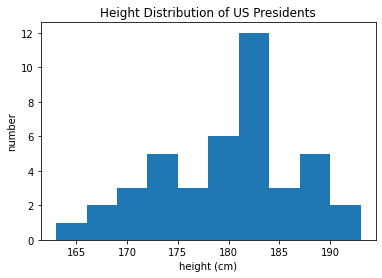

In [18]:
plt.hist(df['height(cm)'])
plt.title('Height Distribution of US Presidents')
plt.xlabel('height (cm)')
plt.ylabel('number');

In [19]:
df['height(cm)'].mean()
df['height(cm)'].median()
df['height(cm)'].mode()

179.73809523809524

182.0

0    183
dtype: int64

## scipy.stats.skew & kurt 
- https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.skew.html
- https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kurtosis.html?highlight=kurtosis#scipy.stats.kurtosis

In [20]:
df['height(cm)'].skew()
df['height(cm)'].kurt()

-0.2520337007049649

-0.3823273337498865

## pandas.DataFrame.plot.bar
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.bar.html

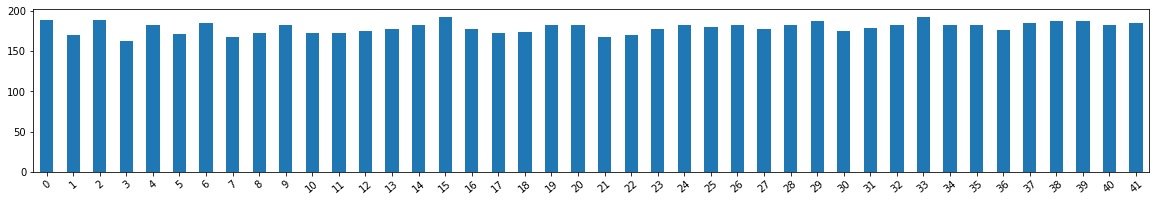

In [21]:
df['height(cm)'].plot.bar(rot ='40', figsize=(20,3))

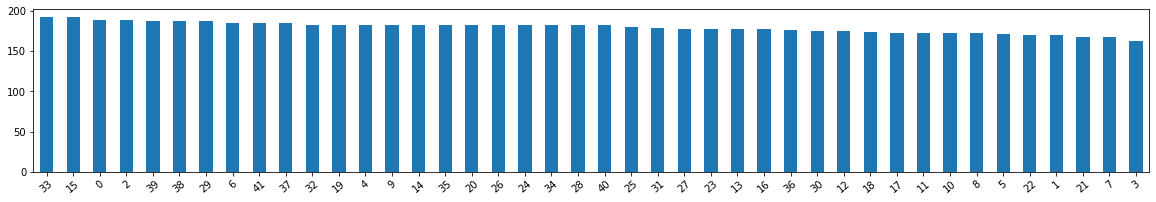

In [22]:
df['height(cm)'].sort_values(ascending=False).plot.bar(rot ='40', figsize=(20,3))

C:\Users\NFSI291\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


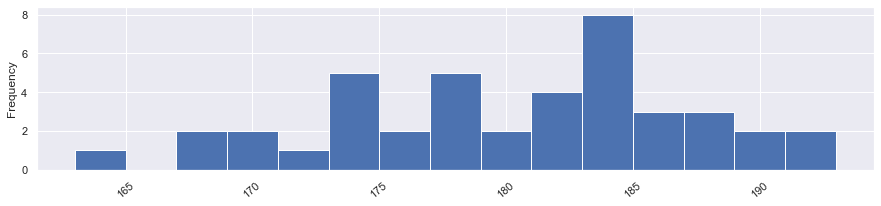

In [23]:
import seaborn as sns; sns.set()
df['height(cm)'].plot.hist(bins= 15, rot ='40', figsize=(15,3))

# End